<a href="https://colab.research.google.com/github/Sanarazaaa/Microbial-Abundance-Analysis-Under-Nutrient-Conditions/blob/main/Microbial_Abundance_Analysis_Under_Nutrient_Conditions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Let's start by downloading a publicly available dataset.
# For this example, we'll use a mock CSV that resembles a microbial abundance table under different nutrient conditions.
# Later you can replace it with real data from sources like MG-RAST, NCBI, or Earth Microbiome Project.

import pandas as pd
import os

# Create a sample microbial abundance dataset
data = {
    'Taxa': ['Bacteroides', 'Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Verrucomicrobia'],
    'High_Nutrient_Sample1': [100, 150, 80, 30, 10],
    'High_Nutrient_Sample2': [110, 140, 90, 25, 15],
    'Low_Nutrient_Sample1': [60, 90, 70, 40, 30],
    'Low_Nutrient_Sample2': [55, 85, 65, 45, 35]
}

df = pd.DataFrame(data)

# Define the directory and filename
output_dir = '.' # Save to the current working directory
filename = 'microbial_nutrient_samples.csv'
output_path = os.path.join(output_dir, filename)

# Save the DataFrame to a CSV file
df.to_csv(output_path, index=False)

print(f"Dataset saved to {output_path}")
df.head()

Dataset saved to ./microbial_nutrient_samples.csv


,Taxa,High_Nutrient_Sample1,High_Nutrient_Sample2,Low_Nutrient_Sample1,Low_Nutrient_Sample2
0,Bacteroides,100,110,60,55
1,Firmicutes,150,140,90,85
2,Proteobacteria,80,90,70,65
3,Actinobacteria,30,25,40,45
4,Verrucomicrobia,10,15,30,35


In [4]:
import pandas as pd

# Load the dataset
filename = 'microbial_nutrient_samples.csv' # Load from the locally saved file
df = pd.read_csv(filename)
df.set_index('Taxa', inplace=True)
df.head()

,High_Nutrient_Sample1,High_Nutrient_Sample2,Low_Nutrient_Sample1,Low_Nutrient_Sample2
Taxa,,,,
Bacteroides,100,110,60,55
Firmicutes,150,140,90,85
Proteobacteria,80,90,70,65
Actinobacteria,30,25,40,45
Verrucomicrobia,10,15,30,35


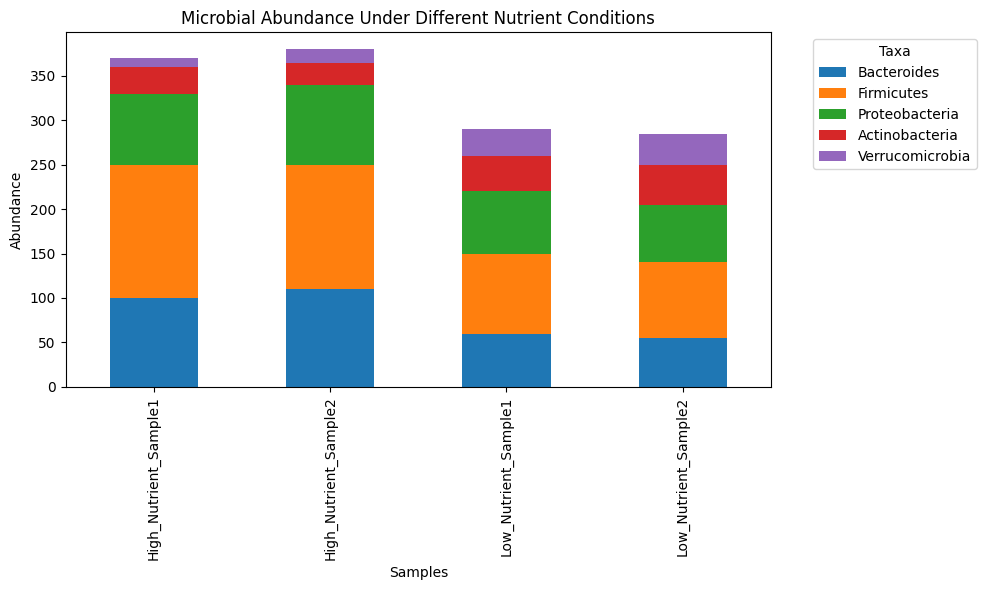

In [5]:
import matplotlib.pyplot as plt

df.T.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Microbial Abundance Under Different Nutrient Conditions")
plt.xlabel("Samples")
plt.ylabel("Abundance")
plt.legend(title="Taxa", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [6]:
df['High_Nutrient_Mean'] = df[['High_Nutrient_Sample1', 'High_Nutrient_Sample2']].mean(axis=1)
df['Low_Nutrient_Mean'] = df[['Low_Nutrient_Sample1', 'Low_Nutrient_Sample2']].mean(axis=1)

df[['High_Nutrient_Mean', 'Low_Nutrient_Mean']]


,High_Nutrient_Mean,Low_Nutrient_Mean
Taxa,,
Bacteroides,105.0,57.5
Firmicutes,145.0,87.5
Proteobacteria,85.0,67.5
Actinobacteria,27.5,42.5
Verrucomicrobia,12.5,32.5


In [7]:
df['Fold_Change (High/Low)'] = df['High_Nutrient_Mean'] / df['Low_Nutrient_Mean']
df[['High_Nutrient_Mean', 'Low_Nutrient_Mean', 'Fold_Change (High/Low)']].sort_values(by='Fold_Change (High/Low)', ascending=False)


,High_Nutrient_Mean,Low_Nutrient_Mean,Fold_Change (High/Low)
Taxa,,,
Bacteroides,105.0,57.5,1.826087
Firmicutes,145.0,87.5,1.657143
Proteobacteria,85.0,67.5,1.259259
Actinobacteria,27.5,42.5,0.647059
Verrucomicrobia,12.5,32.5,0.384615
